In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data for our Analysis

In [2]:
# Importing house price csv dataset
df = pd.read_csv('House Price.csv')
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


##### No NULL values present in data

In [4]:
df.describe() 

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


##### Here, we get to know that most of the houses around more than 75% are under construction.also, most of the houses are of 2 BHK and maximum properties are for resale, only few are fresh properties and also we get to know that maximum houses are under 1Cr but there are even houses only a few but are priced at even 300Cr.

In [5]:
df.describe(include='object')

,POSTED_BY,BHK_OR_RK,ADDRESS
count,29451,29451,29451
unique,3,2,6899
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,18291,29427,509


In [6]:
df.duplicated().sum()

401

##### There are some duplicate rows, so we remove them from our data

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [9]:
for i in df.select_dtypes(include = 'object').columns:
    print(df[i].value_counts())
    print("____________________________________________________________________________________________")

POSTED_BY
Dealer     17961
Owner      10470
Builder      619
Name: count, dtype: int64
____________________________________________________________________________________________
BHK_OR_RK
BHK    29026
RK        24
Name: count, dtype: int64
____________________________________________________________________________________________
ADDRESS
Zirakpur,Chandigarh                       474
Whitefield,Bangalore                      222
Raj Nagar Extension,Ghaziabad             212
Sector-137 Noida,Noida                    136
New Town,Kolkata                          129
                                         ... 
haripur phutkuwan Rampur Road,Haldwani      1
Kolshet,Lalitpur                            1
Ambika Township,Jivarajpark,Rajkot          1
Cheranalloor,Kochi                          1
E3-108, Lake View Recidency,,Vapi           1
Name: count, Length: 6899, dtype: int64
____________________________________________________________________________________________


In [10]:
df1=df[["POSTED_BY","UNDER_CONSTRUCTION","RERA","BHK_NO.","BHK_OR_RK","READY_TO_MOVE","RESALE"]]
df1

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,READY_TO_MOVE,RESALE
0,Owner,0,0,2,BHK,1,1
1,Dealer,0,0,2,BHK,1,1
2,Owner,0,0,2,BHK,1,1
3,Owner,0,1,2,BHK,1,1
4,Dealer,1,0,2,BHK,0,1
...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,1,1
29447,Owner,0,0,2,BHK,1,1
29448,Dealer,0,0,2,BHK,1,1
29449,Owner,0,0,2,BHK,1,1


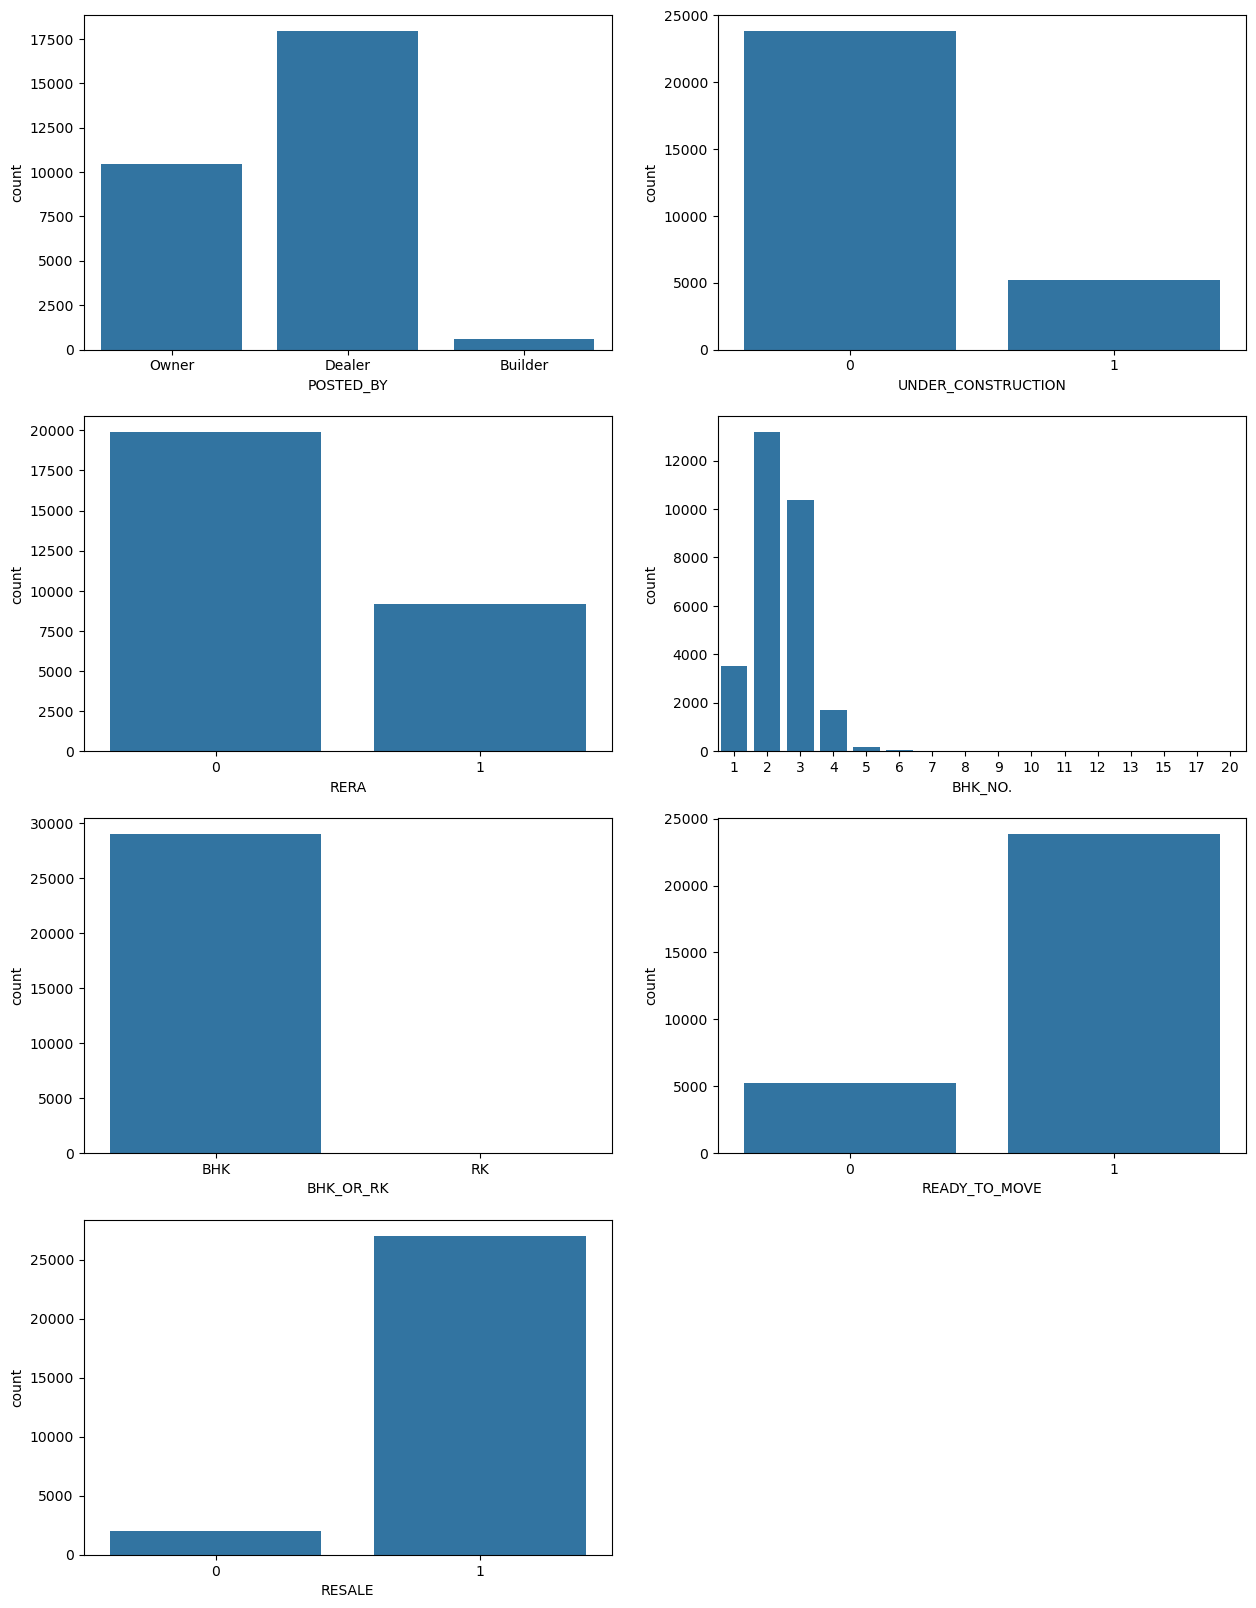

In [11]:
plt.figure(figsize=(15,20))
for i in df1.columns:
    plt.subplot(4,2, df1.columns.get_loc(i)+1)
    sns.countplot(x = df1[i] , data = df1)

In [12]:
df["BHK_NO."].value_counts()

BHK_NO.
2     13164
3     10365
1      3540
4      1698
5       189
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64

In [13]:
df[['LOCALITY', 'CITY']] = df['ADDRESS'].str.rsplit(',', n=1, expand=True)

In [14]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LOCALITY,CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,New Town,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Shamshabad Road,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,"E3-108, Lake View Recidency,",Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Ajmer Road,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Sholinganallur,Chennai


In [15]:
df["CITY"].value_counts()

CITY
Bangalore      4272
Lalitpur       2963
Mumbai         2006
Pune           1980
Noida          1718
               ... 
Bhadrak           1
Kurukshetra       1
Dibrugarh         1
Sagar             1
Washim            1
Name: count, Length: 256, dtype: int64

In [16]:
df["CITY"].nunique()

256

In [17]:
df2=df[["POSTED_BY","UNDER_CONSTRUCTION","RERA","BHK_NO.","BHK_OR_RK","READY_TO_MOVE","RESALE","ADDRESS"]]

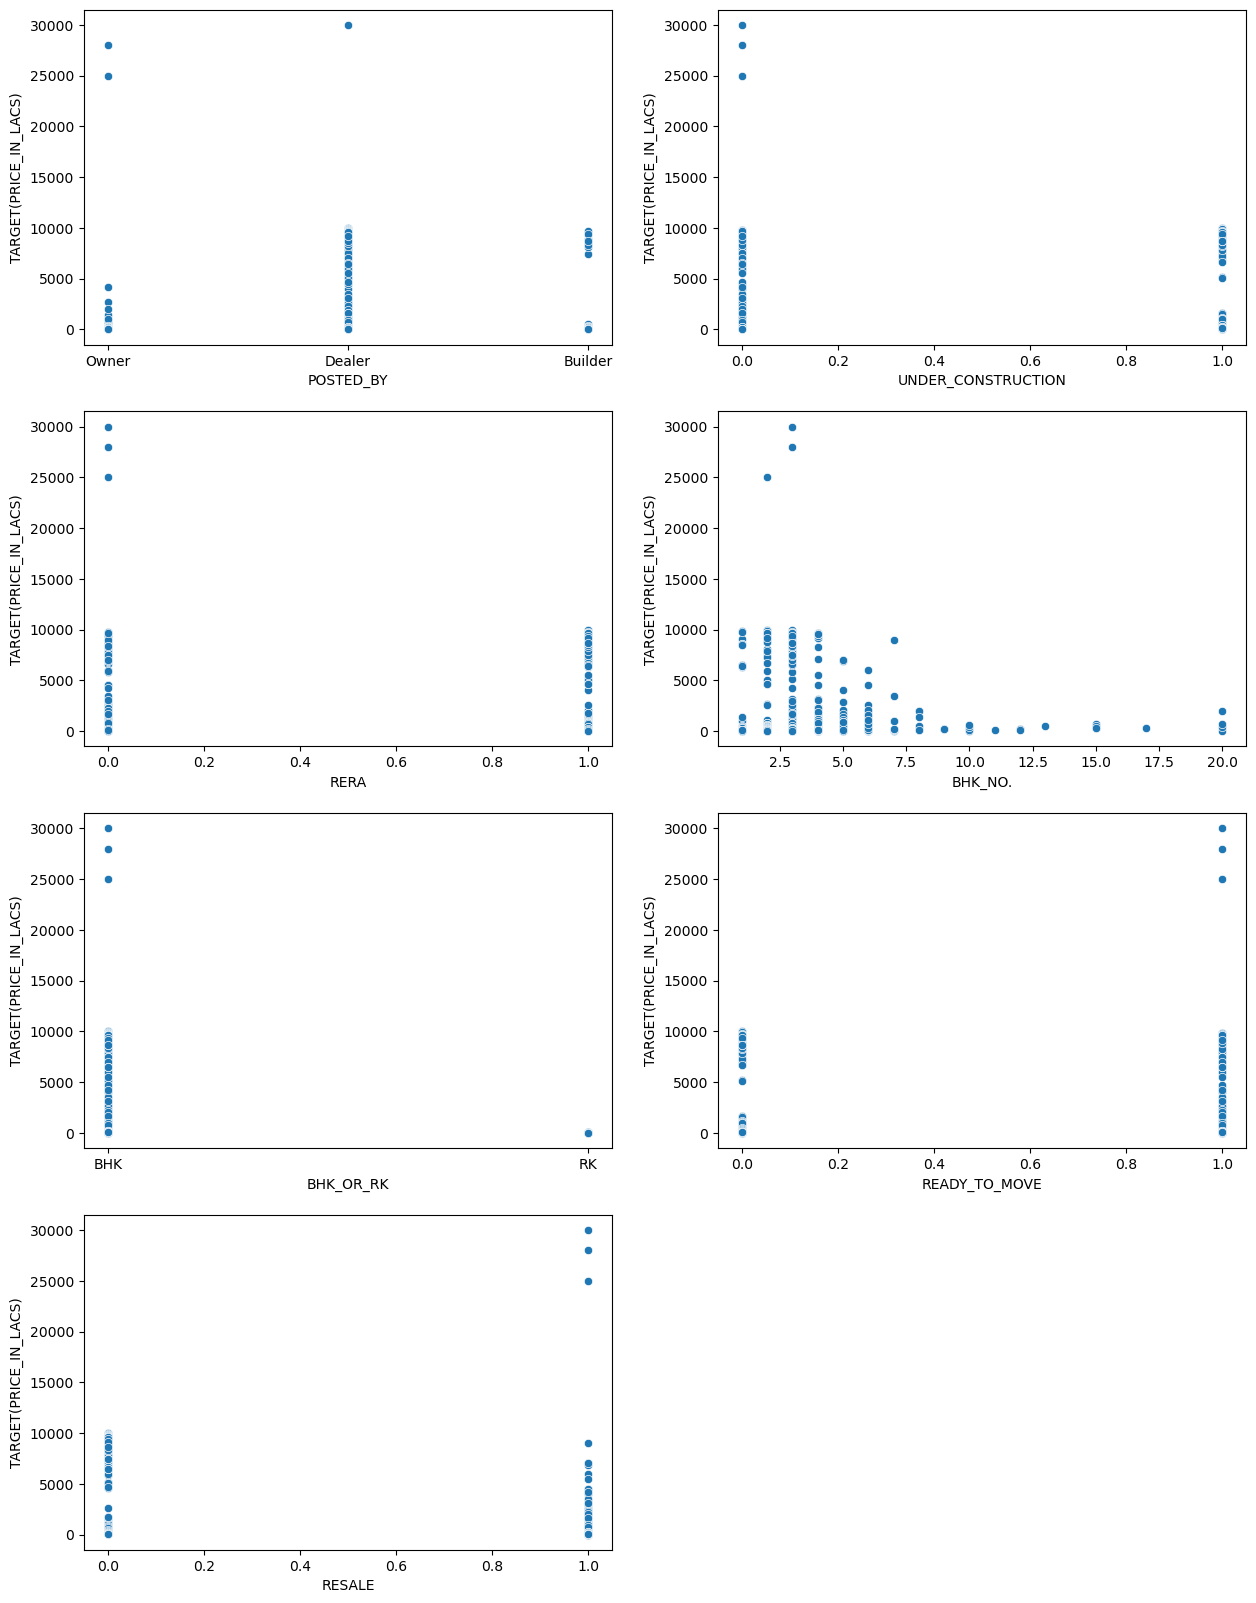

In [18]:
plt.figure(figsize=(15,20))
for i in df1.columns:
    plt.subplot(4,2, df1.columns.get_loc(i)+1)
    sns.scatterplot(x=df[i],y=df['TARGET(PRICE_IN_LACS)'])

In [19]:
num_df=df.select_dtypes(include = ['int64', 'float64']).columns
df[num_df].corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.364299,-0.042503,-0.004233,-1.000000,-0.346085,0.006420,-0.000850,0.054618
RERA,0.364299,1.000000,0.008403,-0.006251,-0.364299,-0.270268,0.103617,-0.065424,0.067314
BHK_NO.,-0.042503,0.008403,1.000000,0.005337,0.042503,0.013146,0.067711,0.046988,0.113654
SQUARE_FT,-0.004233,-0.006251,0.005337,1.000000,0.004233,0.001768,-0.012646,0.000813,0.409571
READY_TO_MOVE,-1.000000,-0.364299,0.042503,0.004233,1.000000,0.346085,-0.006420,0.000850,-0.054618
RESALE,-0.346085,-0.270268,0.013146,0.001768,0.346085,1.000000,0.023274,0.015824,-0.203275
LONGITUDE,0.006420,0.103617,0.067711,-0.012646,-0.006420,0.023274,1.000000,-0.156784,-0.030505
LATITUDE,-0.000850,-0.065424,0.046988,0.000813,0.000850,0.015824,-0.156784,1.000000,-0.017813
TARGET(PRICE_IN_LACS),0.054618,0.067314,0.113654,0.409571,-0.054618,-0.203275,-0.030505,-0.017813,1.000000


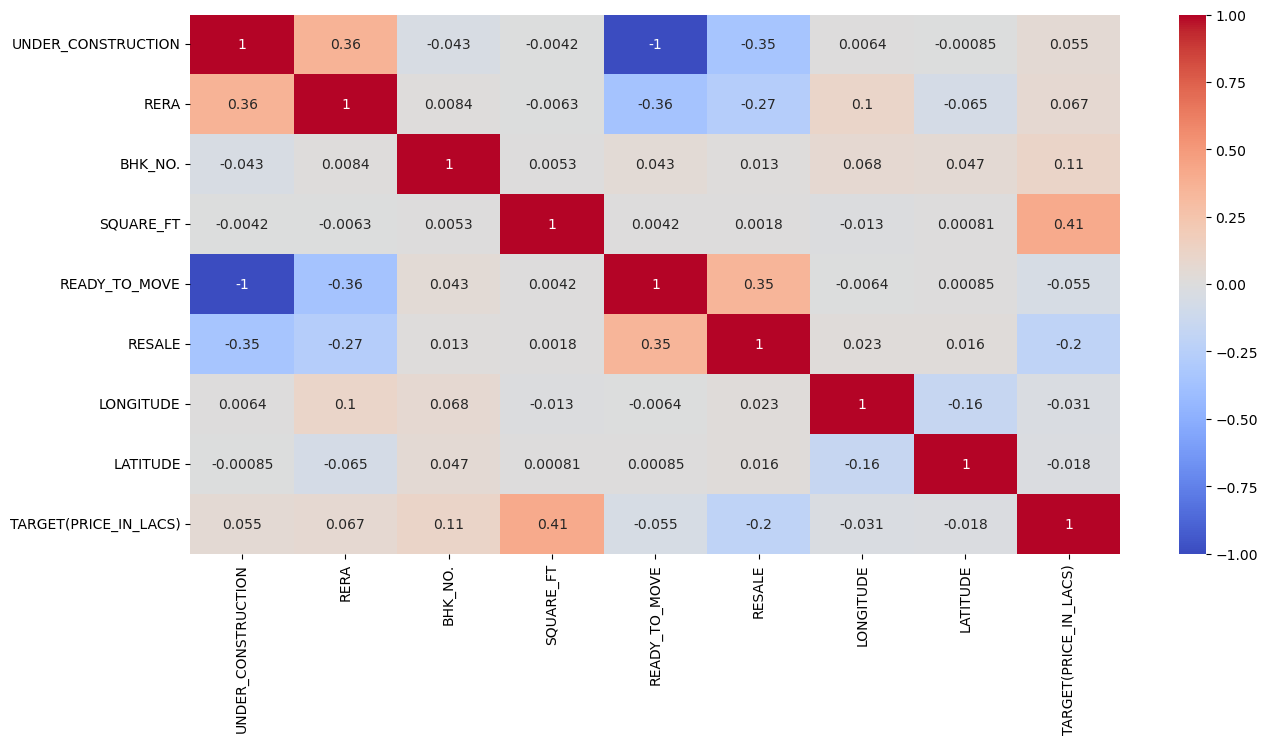

In [20]:
# Using heatmap to see the relationships
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_df].corr(),annot = True, cmap = "coolwarm")
plt.show()

##### Here, we can see there is not much relationship between Target(Price_in_Lacs) and other independent variables, only Square_Ft is shwoing some significant positive relationship with the target variable and a bit negative correlation exists with Resale variable and all other variabkle are not much related with our depenedent variable

In [21]:
df[num_df].skew()

UNDER_CONSTRUCTION         1.675076
RERA                       0.792238
BHK_NO.                    2.411951
SQUARE_FT                115.812901
READY_TO_MOVE             -1.675076
RESALE                    -3.381700
LONGITUDE                  0.185040
LATITUDE                 -10.322082
TARGET(PRICE_IN_LACS)     17.971976
dtype: float64

##### Here, there is a very high skewness in Square_ft variable and then in Latitude variable as well 

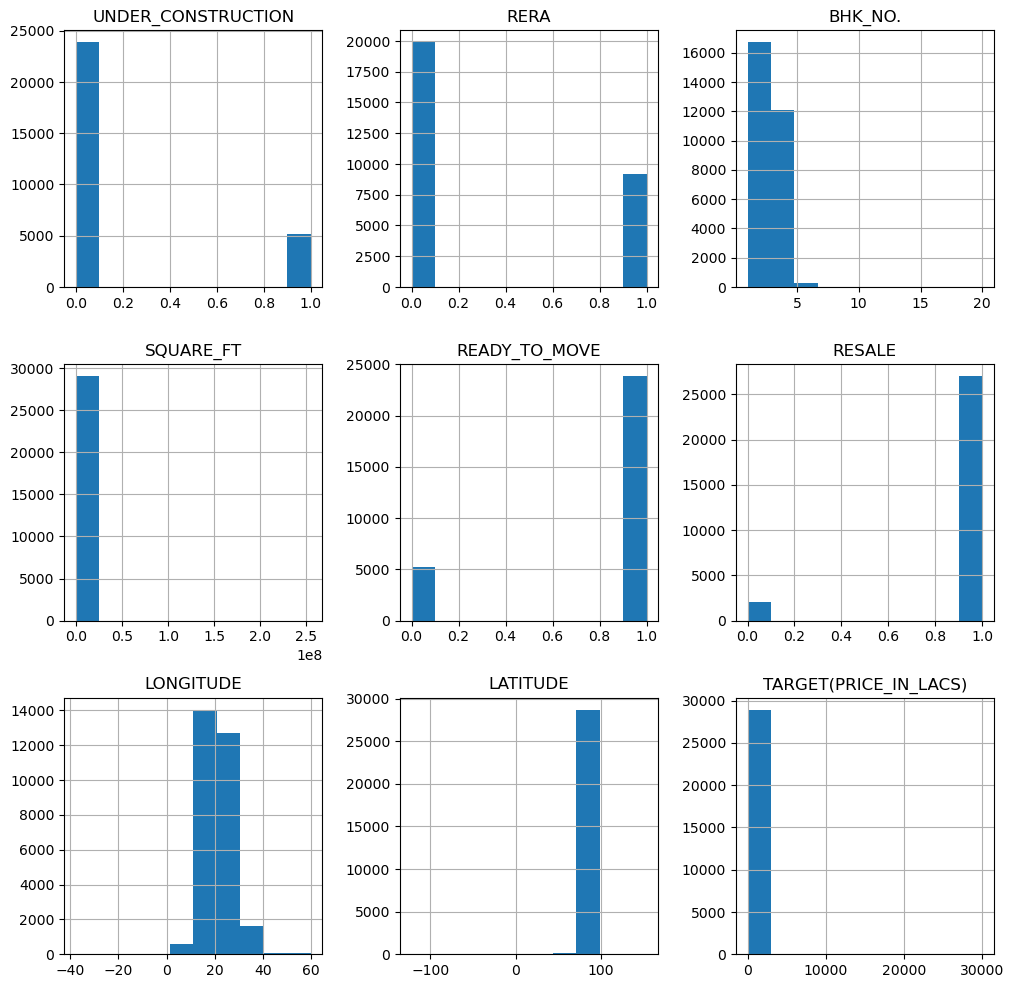

In [22]:
df[num_df].hist(figsize=(12,12));

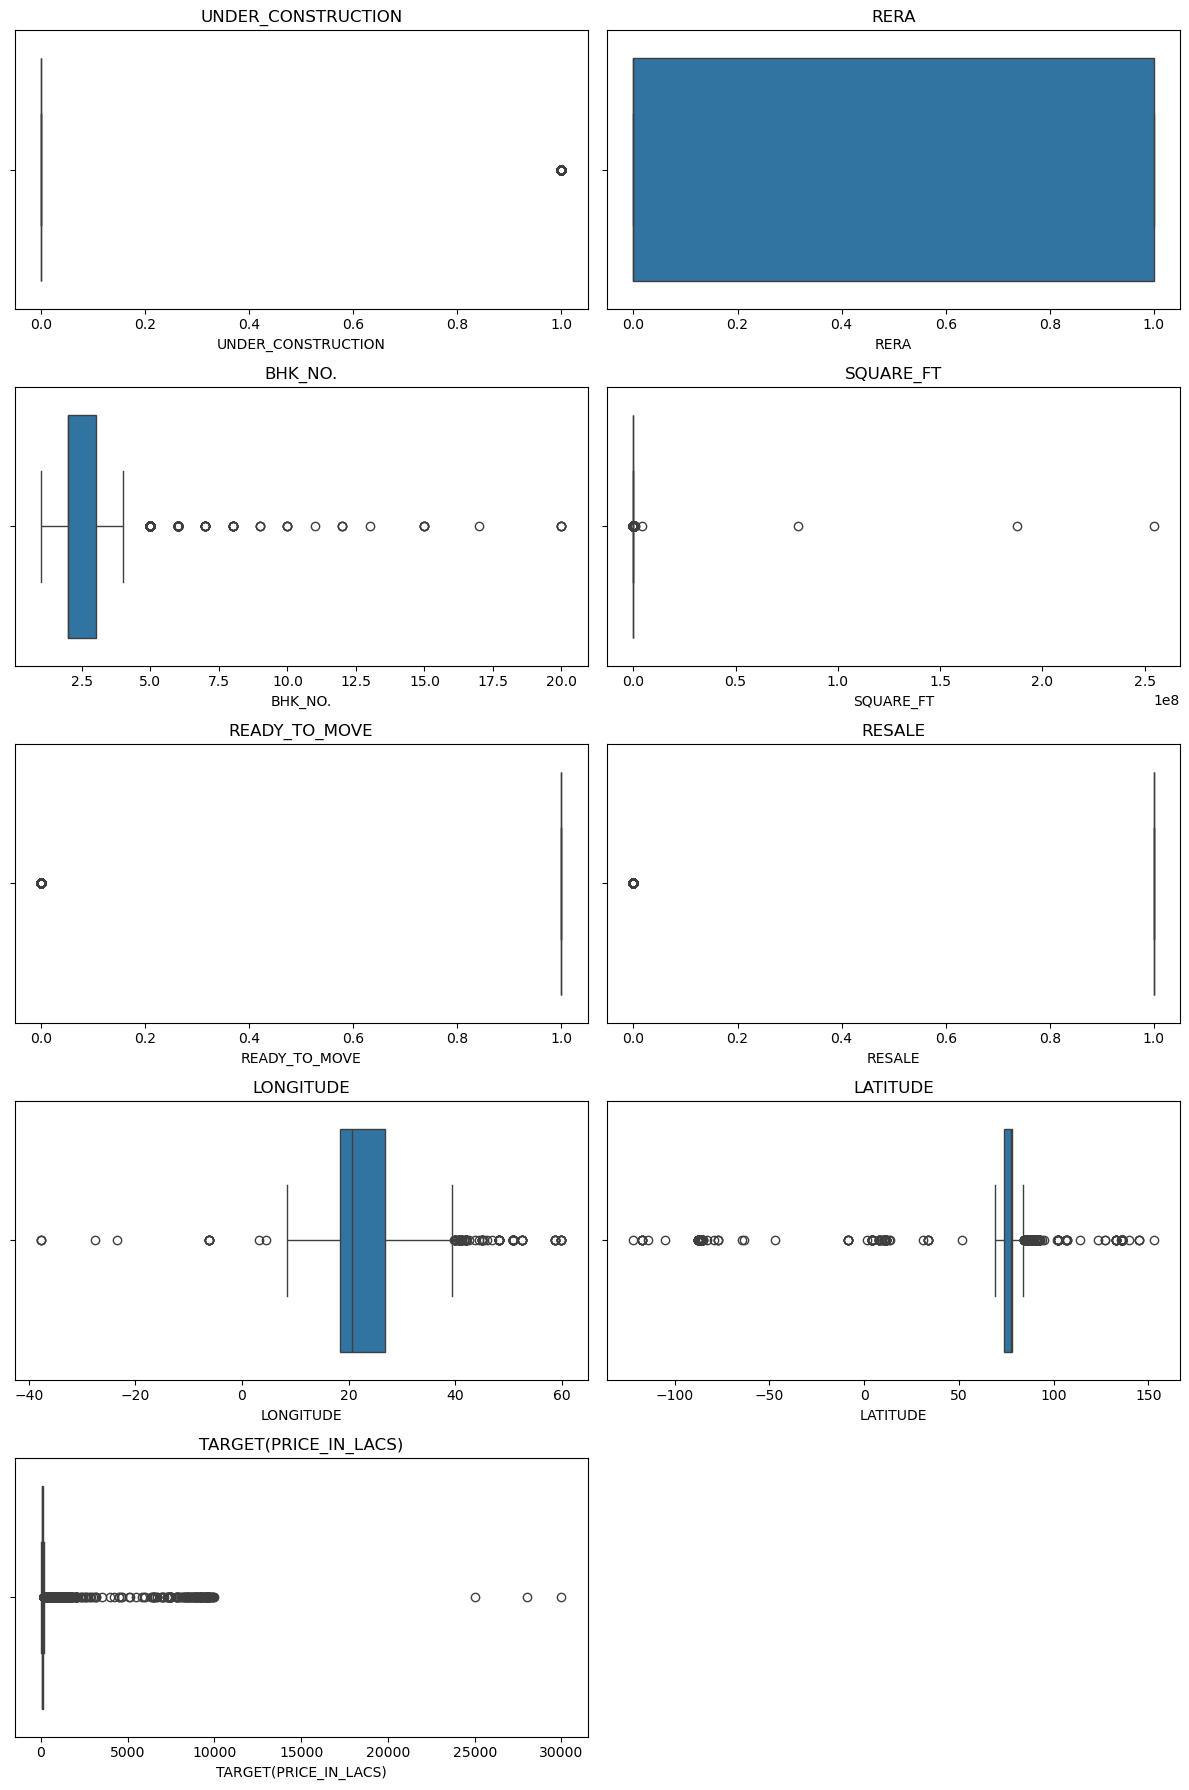

In [23]:
plt.figure(figsize=(12,18))

for col in df[num_df].columns:
    plt.subplot(5, 2,df[num_df].columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.boxplot(x=df[num_df][col])
    plt.title(col)

plt.tight_layout()
plt.show()

##### Here, the outliers are not really outliers as there can be houses with these variables, may be less but may be present. So, now we try to reduce the skewness of the given variables.

In [24]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LOCALITY,CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,New Town,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Shamshabad Road,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,"E3-108, Lake View Recidency,",Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Ajmer Road,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Sholinganallur,Chennai


In [25]:
df = df.drop("ADDRESS", axis=1)

In [26]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LOCALITY,CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,New Town,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0,Shamshabad Road,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0,"E3-108, Lake View Recidency,",Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1,Ajmer Road,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0,Sholinganallur,Chennai


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
df[['POSTED_BY', 'BHK_OR_RK', 'LOCALITY','CITY']] = df[['POSTED_BY', 'BHK_OR_RK','LOCALITY','CITY']].apply(le.fit_transform)

In [30]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LOCALITY,CITY
0,2,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,2432,21
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,5623,160
2,2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,1948,21
3,2,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,4364,78
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,3296,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0,4790,1
29447,2,0,0,2,0,769.230769,1,1,39.945409,-86.150721,16.0,1306,244
29448,1,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1,136,105
29449,2,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0,4873,49


In [31]:
df['LOCALITY'].nunique()

5915

##### Since, there is not much data available for each locality as seen by the number of unique values in "LOCALITY' column, around 5915 unique values for just around 29000 rows, so we cannot precisely predict values according to Locality, so we remove that column and just focus on City.

In [32]:
df = df.drop('LOCALITY', axis=1)

In [33]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,2,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,21
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,160
2,2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,21
3,2,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,78
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,134
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0,1
29447,2,0,0,2,0,769.230769,1,1,39.945409,-86.150721,16.0,244
29448,1,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1,105
29449,2,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0,49


In [34]:
df['log_SQUARE_FT'] = np.log(df['SQUARE_FT'] + 1)  # Adding 1 to avoid log(0)

##### Since, log transformation cannot be applied on negative skewed variables, so we apply YeoJohnson transformation to reduce its skewness.

In [35]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [36]:
df['YeoJohnson_LATITUDE'] = scaler.fit_transform(df[['LATITUDE']])

In [37]:
transformed_skewness = df[['log_SQUARE_FT', 'YeoJohnson_LATITUDE']].skew()
print("Transformed Skewness:")
print(transformed_skewness)

Transformed Skewness:
log_SQUARE_FT          2.888118
YeoJohnson_LATITUDE    2.273203
dtype: float64


In [38]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,log_SQUARE_FT,YeoJohnson_LATITUDE
0,2,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,21,7.171070,0.042345
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,160,7.151485,-0.101235
2,2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,21,6.839647,0.047522
3,2,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,78,6.836175,0.004056
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,134,6.907765,1.765157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0,1,7.824446,0.109819
29447,2,0,0,2,0,769.230769,1,1,39.945409,-86.150721,16.0,244,6.646690,-7.107248
29448,1,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1,105,6.931122,-0.223270
29449,2,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0,49,6.833117,0.444574


In [39]:
df.drop(['SQUARE_FT', 'LATITUDE'], axis=1, inplace=True)

In [40]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,READY_TO_MOVE,RESALE,LONGITUDE,TARGET(PRICE_IN_LACS),CITY,log_SQUARE_FT,YeoJohnson_LATITUDE
0,2,0,0,2,0,1,1,12.969910,55.0,21,7.171070,0.042345
1,1,0,0,2,0,1,1,12.274538,51.0,160,7.151485,-0.101235
2,2,0,0,2,0,1,1,12.778033,43.0,21,6.839647,0.047522
3,2,0,1,2,0,1,1,28.642300,62.5,78,6.836175,0.004056
4,1,1,0,2,0,0,1,22.592200,60.5,134,6.907765,1.765157
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,1,1,27.140626,45.0,1,7.824446,0.109819
29447,2,0,0,2,0,1,1,39.945409,16.0,244,6.646690,-7.107248
29448,1,0,0,2,0,1,1,26.928785,27.1,105,6.931122,-0.223270
29449,2,0,0,2,0,1,1,12.900150,67.0,49,6.833117,0.444574


##### Now, we separate dependent and independent variables and then split the rows for training and testing purpose in 70:30 ratio.

In [41]:
X = df.drop('TARGET(PRICE_IN_LACS)', axis= 1)

In [42]:
y = df['TARGET(PRICE_IN_LACS)']

In [43]:
X

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,READY_TO_MOVE,RESALE,LONGITUDE,CITY,log_SQUARE_FT,YeoJohnson_LATITUDE
0,2,0,0,2,0,1,1,12.969910,21,7.171070,0.042345
1,1,0,0,2,0,1,1,12.274538,160,7.151485,-0.101235
2,2,0,0,2,0,1,1,12.778033,21,6.839647,0.047522
3,2,0,1,2,0,1,1,28.642300,78,6.836175,0.004056
4,1,1,0,2,0,0,1,22.592200,134,6.907765,1.765157
...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,1,1,27.140626,1,7.824446,0.109819
29447,2,0,0,2,0,1,1,39.945409,244,6.646690,-7.107248
29448,1,0,0,2,0,1,1,26.928785,105,6.931122,-0.223270
29449,2,0,0,2,0,1,1,12.900150,49,6.833117,0.444574


In [44]:
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29050, dtype: float64

In [45]:
#Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=40)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((20335, 11), (20335,), (8715, 11), (8715,))

### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()
lm

LinearRegression()

In [48]:
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
print(lm.intercept_)

-5715.930704484081


In [50]:
print(lm.coef_)

[ 3.31160481e+01  2.91383475e+01 -1.06527265e+01 -3.28165447e+02
  6.08336309e+02 -2.91383475e+01 -4.32992480e+02 -4.14205614e+00
  5.32842708e-01  9.94743632e+02 -1.54678022e+01]


In [51]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
POSTED_BY,33.116048
UNDER_CONSTRUCTION,29.138348
RERA,-10.652727
BHK_NO.,-328.165447
BHK_OR_RK,608.336309
READY_TO_MOVE,-29.138348
RESALE,-432.992480
LONGITUDE,-4.142056
CITY,0.532843
log_SQUARE_FT,994.743632


In [52]:
y_pred = lm.predict(X_test)
print(y_pred)

[955.65173913 241.50869902 306.66016594 ... 135.63610619 -83.38012195
 204.24861003]


In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared


0.48560712746947554

In [54]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 180170.5002618422
Root_Mean_Squared_Error : 424.464957637073
r_square_value : 0.48560712746947554


### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , roc_auc_score , roc_curve

In [58]:
dt_model = DecisionTreeRegressor()

In [59]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
import sklearn
import  matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

##### We calculate the ccp alpha values and find its best value to get the best testing accuracy

In [61]:
path = dt_model.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas

In [62]:
limited_ccp_alphas = ccp_alpha[:175]
filtered_ccp_alphas = [alpha for alpha in limited_ccp_alphas if alpha > 0]
print("Limited CCP Alpha Values:", filtered_ccp_alphas)

Limited CCP Alpha Values: [7.047314121155779e-19, 4.892462303340839e-18, 5.590697699612295e-18, 5.590697699612295e-18, 5.590697699612295e-18, 1.118139539922459e-17, 1.118139539922459e-17, 1.118139539922459e-17, 1.118139539922459e-17, 1.118139539922459e-17, 1.118139539922459e-17, 1.6772093098836887e-17, 2.236279079844918e-17, 2.236279079844918e-17, 2.236279079844918e-17, 2.236279079844918e-17, 2.236279079844918e-17, 2.236279079844918e-17, 2.236279079844918e-17, 2.236279079844918e-17, 3.3544186197673775e-17, 4.466912950640278e-17, 4.472558159689836e-17, 4.472558159689836e-17, 4.472558159689836e-17, 4.472558159689836e-17, 4.472558159689836e-17, 5.590417451878382e-17, 6.708837239534755e-17, 6.708837239534755e-17, 8.945116319379672e-17, 8.945116319379672e-17, 8.945116319379672e-17, 8.945116319379672e-17, 8.945116319379672e-17, 1.6740081543176188e-16, 1.7890232638759345e-16, 1.7890232638759345e-16, 1.7890232638759345e-16, 1.7890232638759345e-16, 2.683534895813902e-16, 3.5735303605122226e-16,

##### We plot the graph of accuracy acc=hieved for diiferent ccp alpha values which we selected from the different values found and then lect the best ccp alpha value 

Text(0, 0.5, 'score')

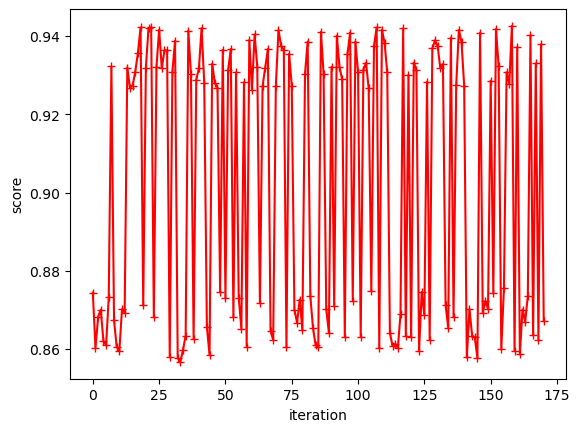

In [63]:
dt_model2 = []
score = []
for i in filtered_ccp_alphas:
    dt_m = DecisionTreeRegressor(ccp_alpha = i)
    dt_m.fit(X_train,y_train)
    dt_model2.append(dt_m)
    score.append(dt_m.score(X_test, y_test))

    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [64]:
dt_model2

[DecisionTreeRegressor(ccp_alpha=7.047314121155779e-19),
 DecisionTreeRegressor(ccp_alpha=4.892462303340839e-18),
 DecisionTreeRegressor(ccp_alpha=5.590697699612295e-18),
 DecisionTreeRegressor(ccp_alpha=5.590697699612295e-18),
 DecisionTreeRegressor(ccp_alpha=5.590697699612295e-18),
 DecisionTreeRegressor(ccp_alpha=1.118139539922459e-17),
 DecisionTreeRegressor(ccp_alpha=1.118139539922459e-17),
 DecisionTreeRegressor(ccp_alpha=1.118139539922459e-17),
 DecisionTreeRegressor(ccp_alpha=1.118139539922459e-17),
 DecisionTreeRegressor(ccp_alpha=1.118139539922459e-17),
 DecisionTreeRegressor(ccp_alpha=1.118139539922459e-17),
 DecisionTreeRegressor(ccp_alpha=1.6772093098836887e-17),
 DecisionTreeRegressor(ccp_alpha=2.236279079844918e-17),
 DecisionTreeRegressor(ccp_alpha=2.236279079844918e-17),
 DecisionTreeRegressor(ccp_alpha=2.236279079844918e-17),
 DecisionTreeRegressor(ccp_alpha=2.236279079844918e-17),
 DecisionTreeRegressor(ccp_alpha=2.236279079844918e-17),
 DecisionTreeRegressor(ccp_alp

In [65]:
train_score = [i.score(X_train,y_train) for i in dt_model2]

In [66]:
test_score = [i.score(X_test ,y_test) for i in dt_model2]

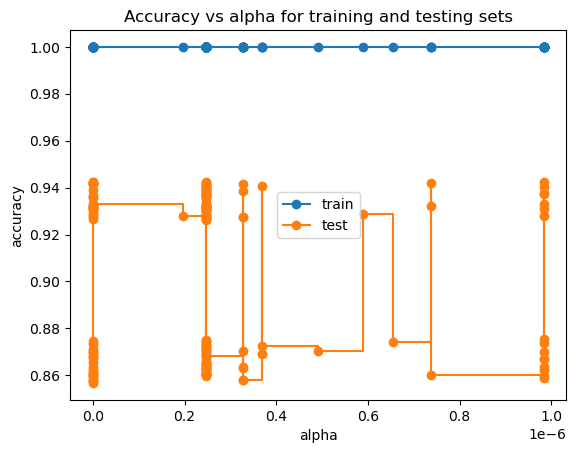

In [67]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(filtered_ccp_alphas, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(filtered_ccp_alphas, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [68]:
from sklearn.model_selection import cross_val_score
alpha_scores = []
for alpha in filtered_ccp_alphas:
    # Fit a pruned tree
    tree = DecisionTreeRegressor( ccp_alpha=alpha)
    scores = cross_val_score(tree, X, y, cv=5)  # 5-fold cross-validation
    alpha_scores.append(scores.mean())  # Store the mean score

# Find the best alpha
best_alpha_index = alpha_scores.index(max(alpha_scores))
best_alpha = filtered_ccp_alphas[best_alpha_index]

print(f"Best alpha: {best_alpha}")


Best alpha: 9.83525940406335e-07


dt_model_ccp = DecisionTreeRegressor(random_state=0 , ccp_alpha=best_alpha)
dt_model_ccp.fit(X_train,y_train)

In [70]:
dt_model_ccp.score(X_train,y_train)

0.9999736247829408

In [71]:
dt_model_ccp.score(X_test,y_test)

0.8666243806816922

Here, we get some issue of overfitting , so now we perform GridSeachCV on our data to get the best parameters and also try to reduce overfitting

In [72]:
grid_pram = {"criterion":['friedman_mse', 'squared_error'],
             "splitter":['best','random'],
             "max_depth" : range(8,28,1),
             "min_samples_split":range(2,5 ,1),
             "min_samples_leaf":range(1,10,1),
             
             }

In [73]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , n_jobs=-1)

In [74]:
grid_ccp.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(ccp_alpha=9.83525940406335e-07,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': range(8, 28),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']})

In [75]:
grid_ccp.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [76]:
dt_cpp_new = DecisionTreeRegressor(criterion='squared_error' , max_depth=8 ,min_samples_leaf=2 , min_samples_split=2 , splitter='best',ccp_alpha=best_alpha)

In [77]:
dt_cpp_new.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=9.83525940406335e-07, max_depth=8,
                      min_samples_leaf=2)

In [78]:
dt_cpp_new.score(X_train,y_train)

0.9772311770550893

In [79]:
dt_cpp_new.score(X_test,y_test)

0.934572226342142

In [80]:
prediction_train = dt_cpp_new.predict(X_train)
prediction_test = dt_cpp_new.predict(X_test)

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
len(ccp_alpha)

15081

In [85]:
ccp_alpha[8000]

0.003688222276862552

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6,7,8],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3],
    'ccp_alpha': [0.0024588148512417014, 0.0029874600442586895, 0.003688222276862552]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           n_jobs=-1,
                           verbose=2)


In [88]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'ccp_alpha': 0.0024588148512417014, 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [89]:
rf_model_new = RandomForestRegressor(max_depth= 8, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150, ccp_alpha= 0.0024588148512417014, random_state=42)

rf_model_new.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.0024588148512417014, max_depth=8,
                      n_estimators=150, random_state=42)

In [92]:
y_pred = rf_model_new.predict(X_test)
print("Test Set Accuracy:", rf_model_new.score(X_test, y_test))

Test Set Accuracy: 0.924820812783678


In [93]:
# Evaluate on test set
y_pred_train = rf_model_new.predict(X_train)
print("Train Set Accuracy:", rf_model_new.score(X_train, y_train))

Test Set Accuracy: 0.9819704687197917


## Now, we try KNN Model

In [110]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale
from sklearn import metrics as sm
from sklearn import neighbors
from sklearn import preprocessing

In [113]:
from sklearn.model_selection import GridSearchCV
param_grid2 = {
    'n_neighbors': [2,3, 4],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn1 = neighbors.KNeighborsRegressor()
grid_search2 = GridSearchCV(knn1, param_grid2)
grid_search2.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [114]:
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_

print("Best Parameters:", best_params2)
print("Best Cross-Validation Score:", best_score2)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best Cross-Validation Score: 0.8706927541066539


## Voting Regressor

In [119]:
from sklearn.ensemble import VotingRegressor

In [136]:
# Gradient Boosting Regression model
from sklearn.ensemble import GradientBoostingRegressor
gb_raw = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 123)
gb_raw.fit(X_train,y_train)
raw_y_pred_train_gb = gb_raw.predict(X_train)
raw_y_pred_val_gb = gb_raw.predict(X_test)

In [137]:
print("Accuracy Scores for Gradient Boost Regressor model on raw data")
raw_gb_rmse = mean_squared_error(y_test, raw_y_pred_val_gb)
raw_train_gb_r2s = r2_score(y_train, raw_y_pred_train_gb)
raw_val_gb_r2s = r2_score(y_test, raw_y_pred_val_gb)
print("Mean Squared Error :", raw_gb_rmse)
print("R-squared Score (Train) :", raw_train_gb_r2s)
print("R-squared Score (Test) :", raw_val_gb_r2s)
print("**************" * 7)

Accuracy Scores for Gradient Boost Regressor model on raw data
Mean Squared Error : 21179.203983638145
R-squared Score (Train) : 0.9750604035605588
R-squared Score (Test) : 0.9395326562382817
**************************************************************************************************


In [139]:
# XGBoost Regression model - Max depth = 2 after testing various values
import xgboost as xgb
xgb_raw = xgb.XGBRegressor(random_state = 111, max_depth = 2)
xgb_raw.fit(X_train,y_train)
raw_y_pred_train_xgb = xgb_raw.predict(X_train)
raw_y_pred_val_xgb = xgb_raw.predict(X_test)

In [140]:
print("Accuracy Scores for XGBoost model on raw data")
raw_xgb_rmse = mean_squared_error(y_test, raw_y_pred_val_xgb)
raw_train_xgb_r2s = r2_score(y_train, raw_y_pred_train_xgb)
raw_val_xgb_r2s = r2_score(y_test, raw_y_pred_val_xgb)
print("Mean Squared Error :", raw_xgb_rmse)
print("R-squared Score (Train) :", raw_train_xgb_r2s)
print("R-squared Score (Test) :", raw_val_xgb_r2s)
print("**************" * 7)

Accuracy Scores for XGBoost model on raw data
Mean Squared Error : 50111.672788880285
R-squared Score (Train) : 0.8546205508009961
R-squared Score (Test) : 0.8569294791560219
**************************************************************************************************


### So, we select Decision Tree as our model as it has the best testing accuracy and also we can more tune it and get higher accuracy than achieved now.